In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# file management imports
import os  ### only for count of images from dir, can be removed later
import tensorflow as tf
# model imports for deep learning
from keras import Input, layers, models, regularizers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import cv2
from sklearn import metrics
#for confusion matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import itertools
from sklearn.metrics import ConfusionMatrixDisplay

#for displaying images when predicting class
from PIL import Image, ImageOps
#for rounding up fitting model for steps_per_epoch
import math

from keras.models import load_model
from google.colab import drive



In [ ]:
!pip install -q xplique

from xplique.attributions import GradientInput
from xplique.attributions import GradCAM


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.4/191.4 kB 1.7 MB/s eta 0:00:00


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! cd "/content/drive/My Drive/Colab_Notebooks/"

! unzip "/content/drive/My Drive/Colab_Notebooks/data_sillouhete_2.zip"


In [ ]:
train_dir = "data_sillouhete/train/"
test_dir = "data_sillouhete/test/"


#Location of train and test sets of circle
train_dir_circle = train_dir+"circle"
test_dir_circle = test_dir+"circle"
#Location of train and test sets of hexagone
train_dir_hexagone = train_dir+"hexagone"
test_dir_hexagone = test_dir+"hexagone"
#Location of train and test sets of rhombus
train_dir_rhombus = train_dir+"rhombus"
test_dir_rhombus = test_dir+"rhombus"
#Location of train and test sets of square
train_dir_square = train_dir+"square"
test_dir_square = test_dir+"square"
#Location of train and test sets of triangle
train_dir_triangle = train_dir+"triangle"
test_dir_triangle = test_dir+"triangle"

In [ ]:
#display image smaller (for checking manually)
def display_image(image_directory):
    im = image.load_img(image_directory)
    fig, ax = plt.subplots(figsize=(10,6))
    # displaying the image with figsize
    ax.imshow(im)

datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=45
)

In [ ]:
# classes= ['Circle','Square','Triangle']
batch_size = 16

#making tensorflow for training data
training_data = datagen.flow_from_directory(directory= train_dir,       # dataset
                                                   target_size = (256,256),      # desired dimensions for the images
                                                   batch_size = 16,    # it will be run in groups of(batch_size specified above)
                                                   class_mode = 'categorical', # type of classifiaction
                                                   color_mode='grayscale'
                                                   )
#making tensorflow for testing data
testing_data = datagen.flow_from_directory(directory= test_dir,
                                                   target_size = (256,256),
                                                   batch_size = 16,
                                                   class_mode = 'categorical',
                                                   color_mode='grayscale'
                                                   )
training_data.image_shape

Found 3821 images belonging to 5 classes.
Found 760 images belonging to 5 classes.


(256, 256, 1)

In [ ]:
input = Input(shape=(256, 256, 1))

x = layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(256, 256, 1), kernel_regularizer=regularizers.L2(0.01))(input)
x = layers.MaxPool2D((2, 2))(x)

x = layers.Conv2D(64, kernel_size=(3, 3), activation='relu')(x)
x = layers.MaxPool2D((2, 2))(x)

x = layers.Conv2D(128, kernel_size=(3, 3), activation='relu')(x)
x = layers.MaxPool2D((2, 2))(x)

x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(5, activation='softmax')(x)

model = models.Model(input, x)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856 

# Nouvelle section

In [ ]:
history = model.fit(training_data, validation_data=testing_data, epochs=50)

Epoch 1/50
239/239 [==============================] - 38s 130ms/step - loss: 0.5895 - accuracy: 0.7969 - val_loss: 0.2956 - val_accuracy: 0.9000
Epoch 2/50
239/239 [==============================] - 29s 123ms/step - loss: 0.3118 - accuracy: 0.8917 - val_loss: 0.1981 - val_accuracy: 0.9263
Epoch 3/50
239/239 [==============================] - 29s 121ms/step - loss: 0.2354 - accuracy: 0.9142 - val_loss: 0.2020 - val_accuracy: 0.9197
Epoch 4/50
239/239 [==============================] - 29s 119ms/step - loss: 0.1878 - accuracy: 0.9364 - val_loss: 0.1272 - val_accuracy: 0.9645
Epoch 5/50
239/239 [==============================] - 29s 120ms/step - loss: 0.1483 - accuracy: 0.9513 - val_loss: 0.1241 - val_accuracy: 0.9645
Epoch 6/50
239/239 [==============================] - 29s 119ms/step - loss: 0.1398 - accuracy: 0.9534 - val_loss: 0.0993 - val_accuracy: 0.9697
Epoch 7/50
239/239 [==============================] - 29s 121ms/step - loss: 0.1164 - accuracy: 0.9610 - val_loss: 0.1003 - val_ac

In [ ]:
accuracy = history.history['accuracy'][1:]
loss = history.history['loss'][1:]
val_accuracy = history.history['val_accuracy'][1:]
val_loss = history.history['val_loss'][1:]

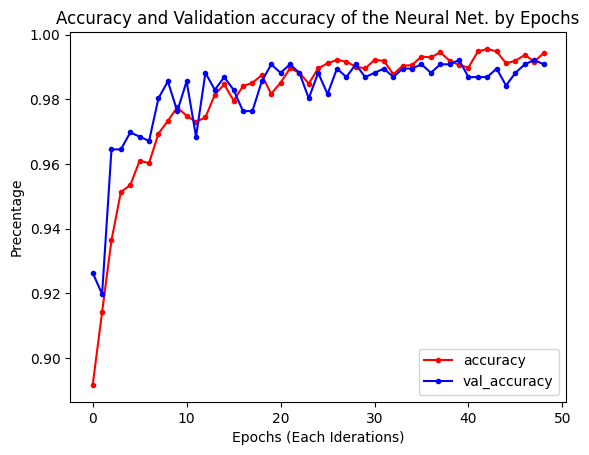

In [ ]:
#plot accuracy for model
plt.plot(range(len(accuracy)), accuracy, 'r', marker= '.', label = 'accuracy')
#plot loss for model
plt.plot(range(len(val_accuracy)), val_accuracy, 'b', marker= '.', label = 'val_accuracy')
plt.xlabel('Epochs (Each Iderations)')
plt.ylabel('Precentage')
plt.title('Accuracy and Validation accuracy of the Neural Net. by Epochs')
plt.legend()

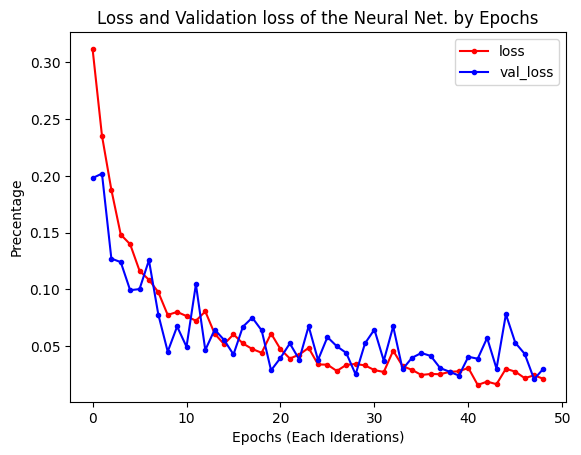

In [ ]:
plt.plot(range(len(loss)), loss, 'r', marker= '.', label = 'loss')
#plot loss for model
plt.plot(range(len(val_loss)), val_loss, 'b', marker= '.', label = 'val_loss')
plt.xlabel('Epochs (Each Iderations)')
plt.ylabel('Precentage')
plt.title('Loss and Validation loss of the Neural Net. by Epochs')
plt.legend()

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
test_set=test_dir_circle+test_dir_square+test_dir_triangle+test_dir_rhombus+test_dir_hexagone
# predicted_classes = np.argmax(predictions, axis=1)
true_classes = testing_data.classes
class_labels = list(testing_data.class_indices.keys())
print(class_labels)
print(true_classes)
testing_data
predictions = model.predict(testing_data)
predicted_classes = np.argmax(predictions, axis=1)


['circle', 'hexagone', 'rhombus', 'square', 'triangle']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3

In [ ]:
cm = metrics.confusion_matrix(true_classes, predicted_classes)

In [ ]:
yhat = []

def evaluate_dir(directory, label):
    files = os.listdir(directory)
    count = 0
    for file in files:
        if file.endswith(".jpg") or file.endswith(".png"):
            img = cv2.imread(os.path.join(directory, file), cv2.IMREAD_GRAYSCALE)
            try:
                img = cv2.resize(img, (256, 256))
                yhat.append(np.argmax(model.predict(np.expand_dims(img, [0, -1]))))
                count += 1
            except:
                print(file)

    print(f"Count: {count}")

evaluate_dir(test_dir_circle, 0)
evaluate_dir(test_dir_hexagone, 1)
evaluate_dir(test_dir_rhombus, 2)
evaluate_dir(test_dir_square, 3)
evaluate_dir(test_dir_triangle, 4)



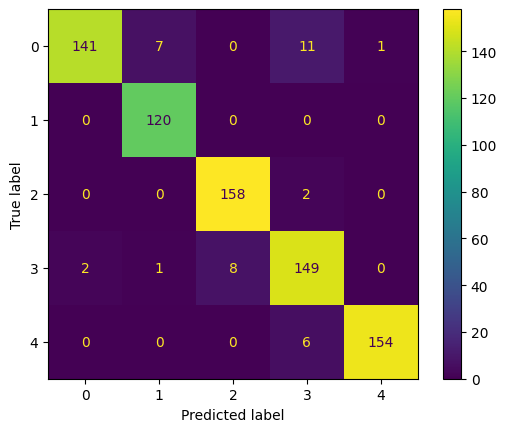

In [ ]:
cf = confusion_matrix(testing_data.labels, yhat)
ConfusionMatrixDisplay(cf).plot()
plt.show()

In [ ]:
def show_xplique(model,img,label,total_label,alpha):
    X = np.squeeze(img, axis = 0)
    explainer1 = GradientInput(model)
    explainer2 = GradCAM(model)
    Y = []

    labels = tf.keras.utils.to_categorical(label,total_label)
    Y.append(labels)

    explanations1 = explainer1(img, Y)
    to_show1 = np.squeeze(explanations1,axis=0)
    explanations2 = explainer2(img, Y)
    to_show2 = np.squeeze(explanations2,axis=0)

    plt.figure()
    fig, ax = plt.subplots(figsize=(10,6))
    # displaying the image with figsize
    ax.imshow(X)
    plt.imshow(to_show1, cmap="jet", alpha=alpha)

    plt.figure()
    fig, ax = plt.subplots(figsize=(10,6))
    # displaying the image with figsize
    ax.imshow(X)
    plt.imshow(to_show2, cmap="jet", alpha=alpha)

In [ ]:
def testing_image(image_directory,model):

#     predicted_classes=

    # loading testing image with the target size for the image
    test_image = image.load_img(image_directory, target_size = (256,256),color_mode='grayscale',)
    # makes sure the image is in RGB (converts all images to have only 3 color channels, png images have 4 color channels)
    # test_image = test_image.convert(mode='grayscale')
    # converts image into an array
    test_image = tf.keras.preprocessing.image.img_to_array(test_image)
    # expands array (from converted image) with a new dimension (for classifying values)
    test_image = np.expand_dims(test_image, axis = 0)
    test_image = tf.keras.applications.inception_v3.preprocess_input(test_image)
    # making prediction based on test_image and labeling it results
    result = model.predict(x = test_image)
    # printing predictions
    print(result)

    #display image smaller (for checking manually)
    display_image(image_directory)

    if np.argmax(result[0]) == 0 :
        print(f'Shape is predicted as a Circle with {"%.1f" % ((result[0][0])*100)}% certainty')
    elif np.argmax(result[0]) == 1  :
        print(f'Shape is predicted as a Hexagone with {"%.1f" % ((result[0][1])*100)}% certainty')
    elif np.argmax(result[0]) == 2  :
        print(f'Shape is predicted as a Rhombus with {"%.1f" % ((result[0][2])*100)}% certainty')
    elif np.argmax(result[0]) == 3  :
        print(f'Shape is predicted as a Square with {"%.1f" % ((result[0][3])*100)}% certainty')
    elif np.argmax(result[0]) == 4  :
        print(f'Shape is predicted as a Triangle with {"%.1f" % ((result[0][4])*100)}% certainty')
    return result, test_image
#display image smaller (for checking manually)
def display_image(image_directory):
    im = image.load_img(image_directory)
    fig, ax = plt.subplots(figsize=(10,6))
    # displaying the image with figsize
    ax.imshow(im)

1/1 [==============================] - 0s 92ms/step
[[1.3434078e-27 0.0000000e+00 2.7517191e-38 3.1288686e-10 1.0000000e+00]]
Shape is predicted as a Triangle with 100.0% certainty


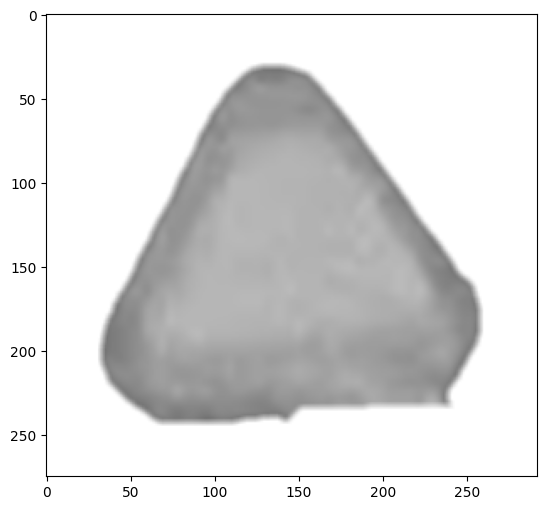

<Figure size 640x480 with 0 Axes>

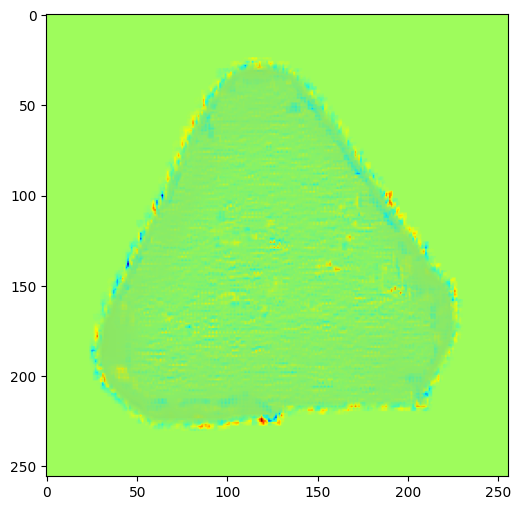

<Figure size 640x480 with 0 Axes>

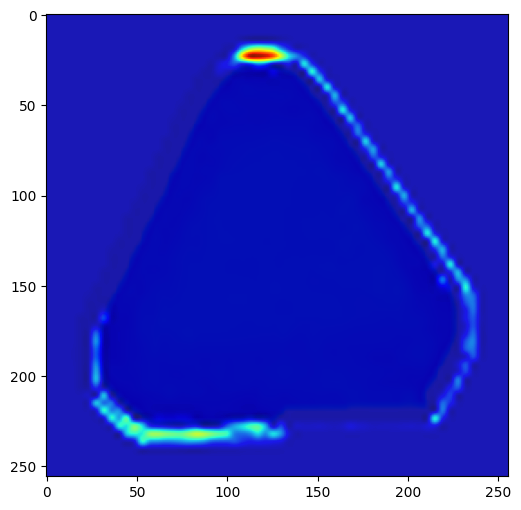

In [ ]:
result, img = testing_image("/content/drive/My Drive/to_predict/extracted_np.png",model)
show_xplique(model,img , np.argmax(result),5,0.9)

1/1 [==============================] - 0s 174ms/step
[[0.000000e+00 0.000000e+00 1.000000e+00 6.305099e-14 0.000000e+00]]
Shape is predicted as a Rhombus with 100.0% certainty


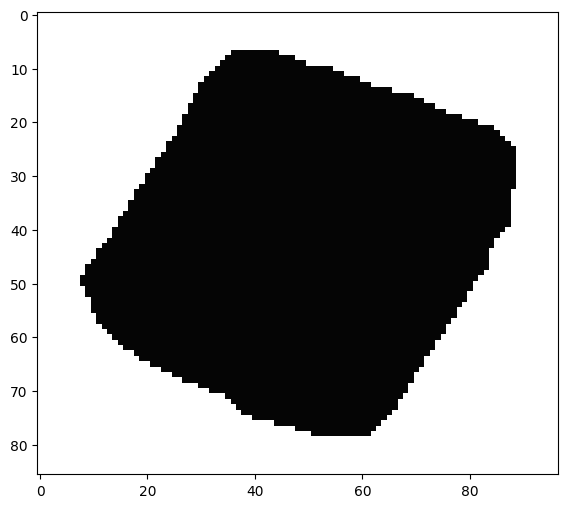

<Figure size 640x480 with 0 Axes>

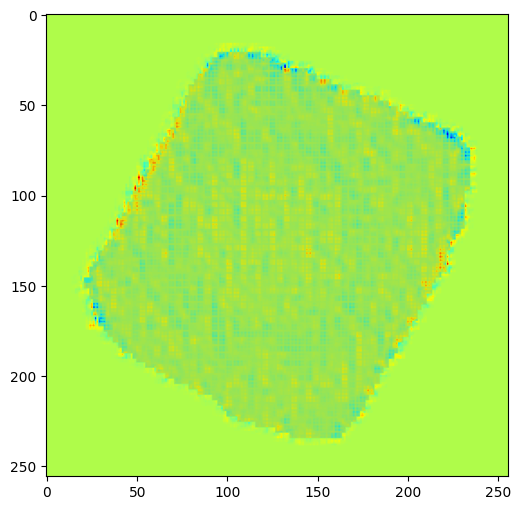

<Figure size 640x480 with 0 Axes>

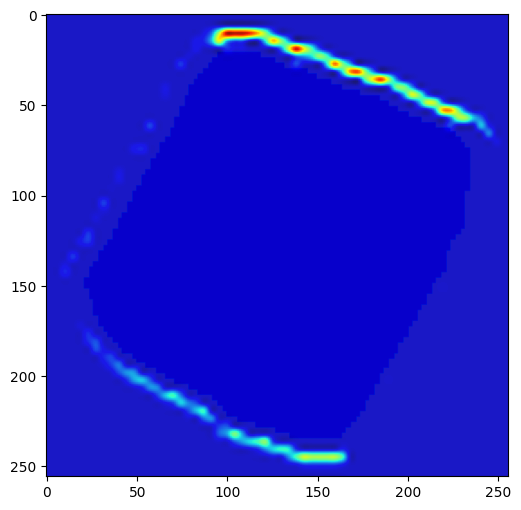

In [ ]:
result, img = testing_image("/content/drive/My Drive/to_predict/rhombus3.png",model)

show_xplique(model,img , np.argmax(result),5,0.9)

1/1 [==============================] - 0s 74ms/step
[[0.0000000e+00 0.0000000e+00 1.0000000e+00 1.1667069e-17 0.0000000e+00]]
Shape is predicted as a Rhombus with 100.0% certainty


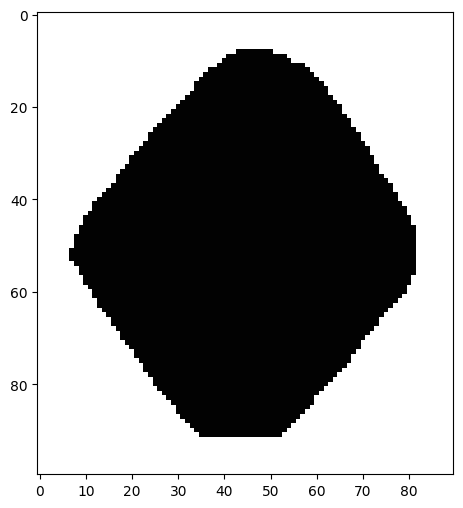

<Figure size 640x480 with 0 Axes>

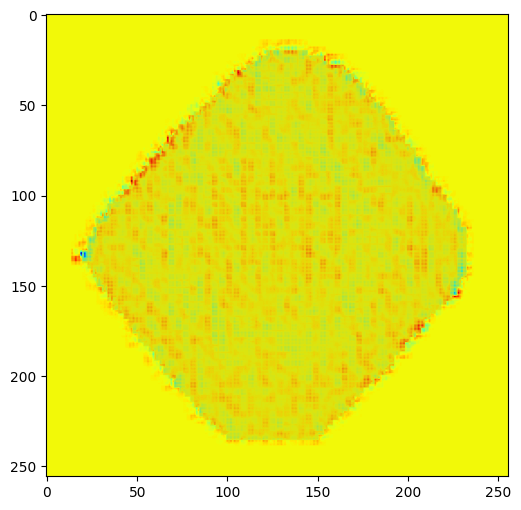

<Figure size 640x480 with 0 Axes>

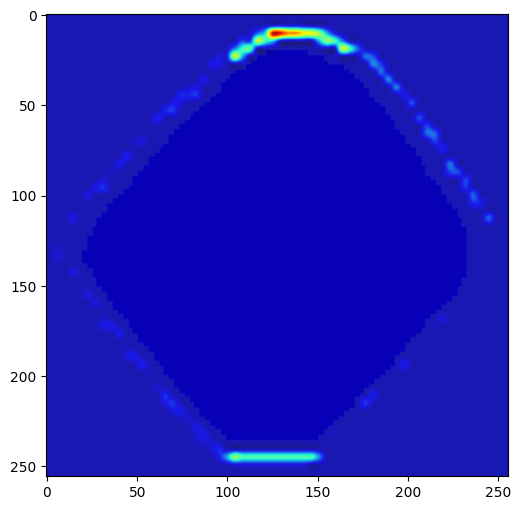

In [ ]:
result, img = testing_image("/content/drive/My Drive/to_predict/rhombus1.png",model)

show_xplique(model,img , np.argmax(result),5,0.9)

1/1 [==============================] - 0s 61ms/step
[[0.0000000e+00 0.0000000e+00 1.0000000e+00 2.8501994e-17 0.0000000e+00]]
Shape is predicted as a Rhombus with 100.0% certainty


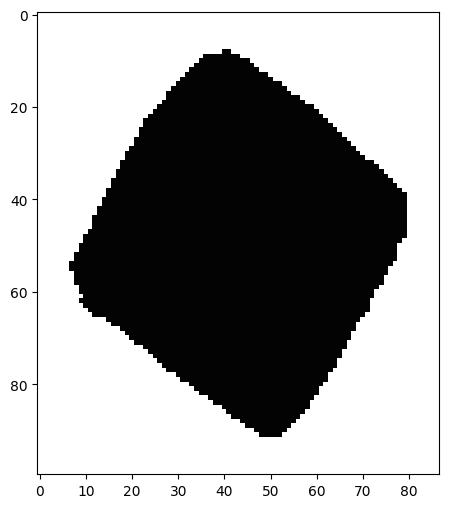

<Figure size 640x480 with 0 Axes>

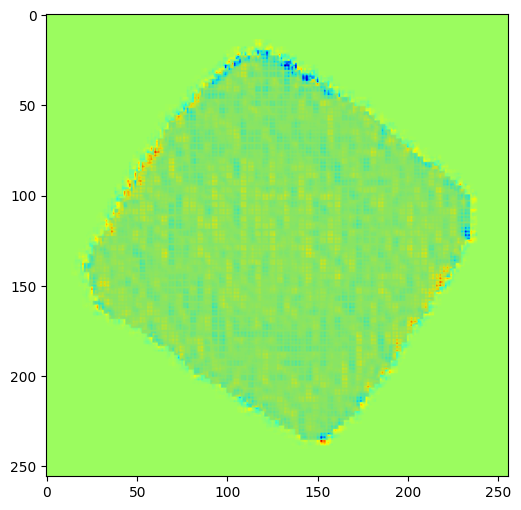

<Figure size 640x480 with 0 Axes>

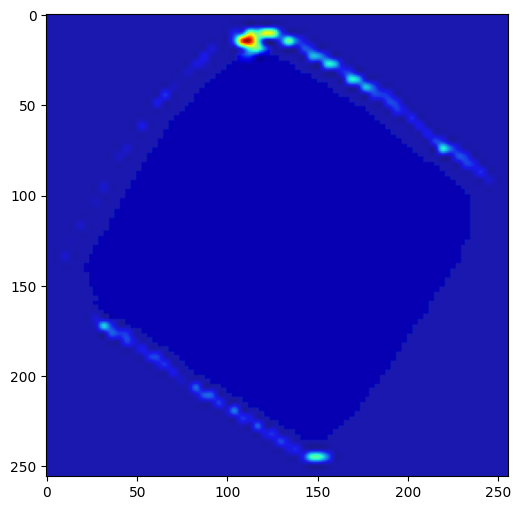

In [ ]:
result, img = testing_image("/content/drive/My Drive/to_predict/rhombus 2.png",model)

show_xplique(model,img , np.argmax(result),5,0.9)

1/1 [==============================] - 0s 74ms/step
[[4.1140749e-10 2.0139647e-12 3.5426768e-12 1.0000000e+00 6.4664913e-09]]
Shape is predicted as a Square with 100.0% certainty


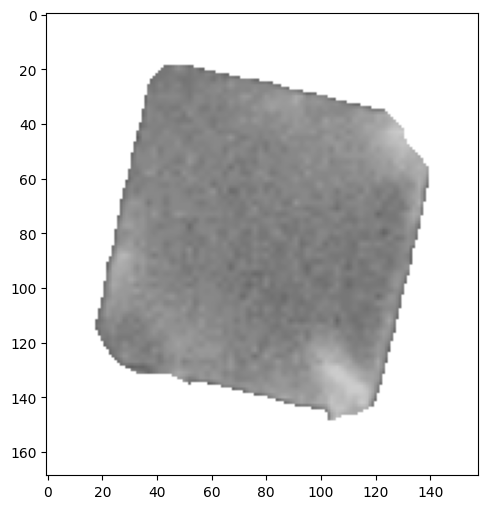

<Figure size 640x480 with 0 Axes>

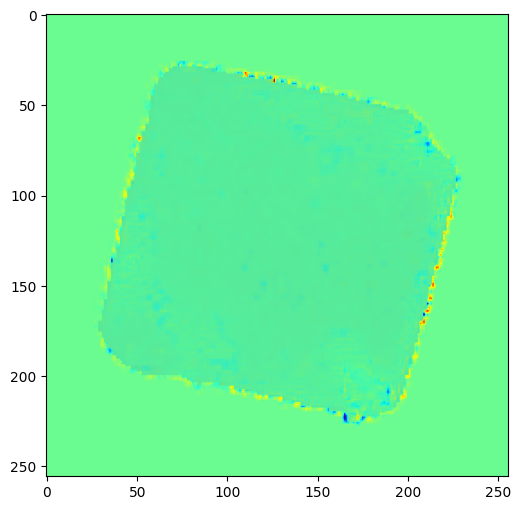

<Figure size 640x480 with 0 Axes>

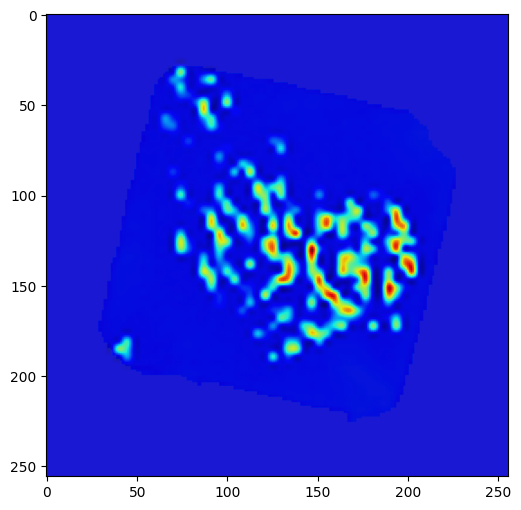

In [ ]:
result, img = testing_image("/content/drive/My Drive/to_predict/extracted_np2.png",model)

show_xplique(model,img , np.argmax(result),5,0.9)

1/1 [==============================] - 0s 87ms/step
[[0.0000000e+00 0.0000000e+00 8.8728465e-36 1.0000000e+00 4.3814083e-32]]
Shape is predicted as a Square with 100.0% certainty


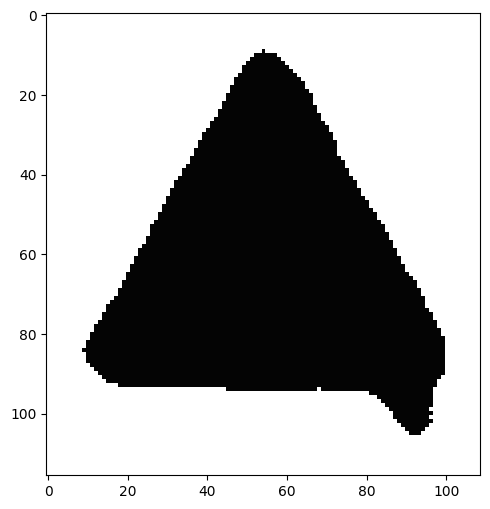

<Figure size 640x480 with 0 Axes>

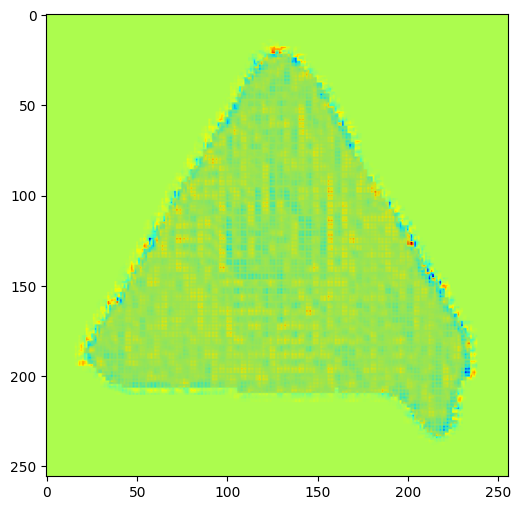

<Figure size 640x480 with 0 Axes>

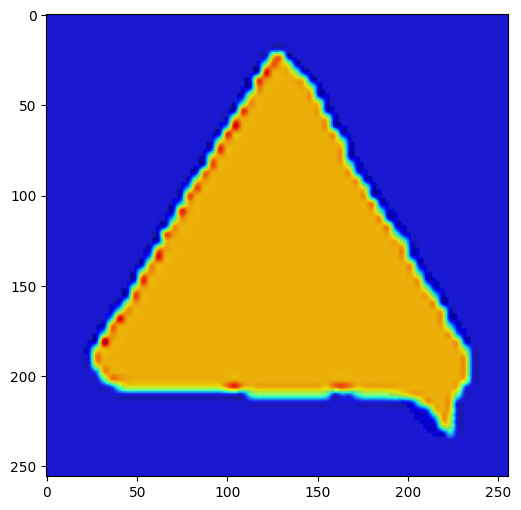

In [ ]:
result, img = testing_image("/content/drive/My Drive/to_predict/triangle1.png",model)

show_xplique(model,img , np.argmax(result),5,0.9)

1/1 [==============================] - 0s 31ms/step
[[1.2769186e-20 0.0000000e+00 2.3884323e-01 7.6115674e-01 0.0000000e+00]]
Shape is predicted as a Square with 76.1% certainty


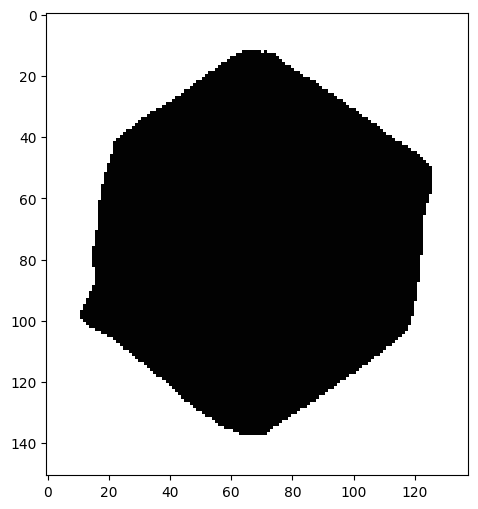

<Figure size 640x480 with 0 Axes>

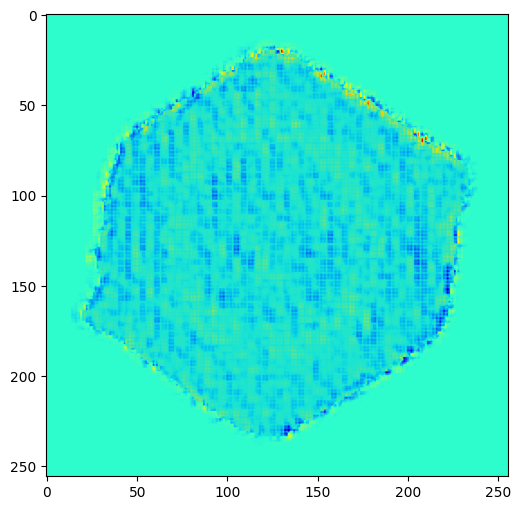

<Figure size 640x480 with 0 Axes>

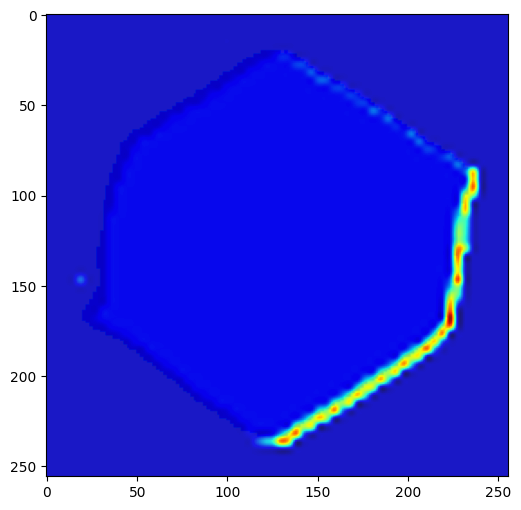

In [ ]:
result, img = testing_image("/content/drive/My Drive/to_predict/hexa2.png",model)

show_xplique(model,img , np.argmax(result),5,0.9)

1/1 [==============================] - 0s 29ms/step
[[0.000000e+00 1.739957e-21 1.000000e+00 7.914911e-15 0.000000e+00]]
Shape is predicted as a Rhombus with 100.0% certainty


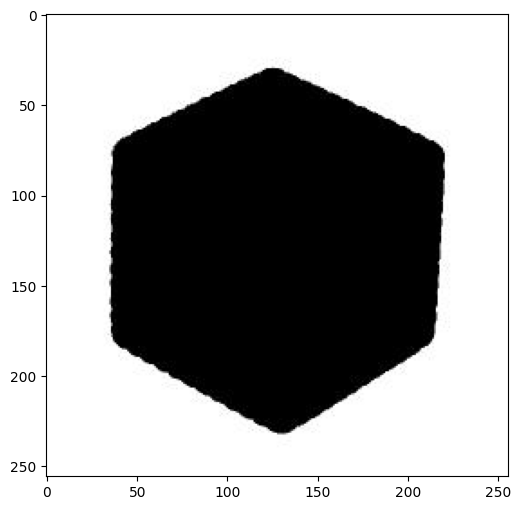

<Figure size 640x480 with 0 Axes>

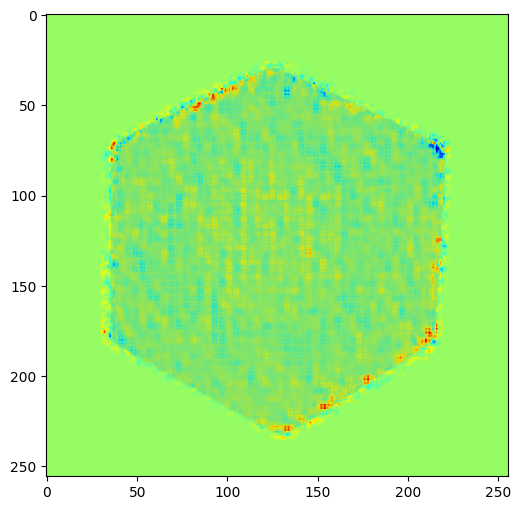

<Figure size 640x480 with 0 Axes>

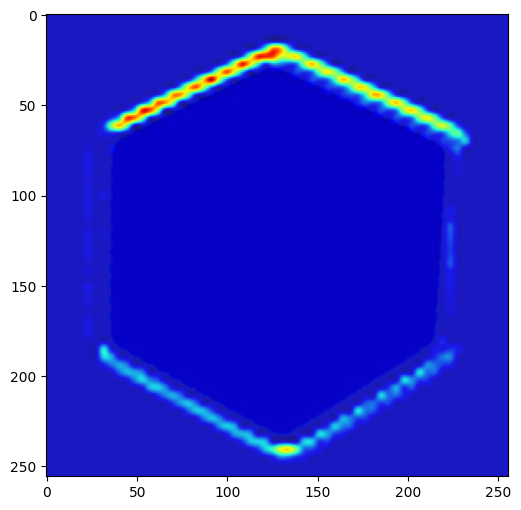

In [ ]:
result, img = testing_image("/content/drive/My Drive/to_predict/hexagone-91.jpg",model)

show_xplique(model,img , np.argmax(result),5,0.9)

1/1 [==============================] - 0s 70ms/step
[[1.6574436e-36 0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00]]
Shape is predicted as a Square with 100.0% certainty


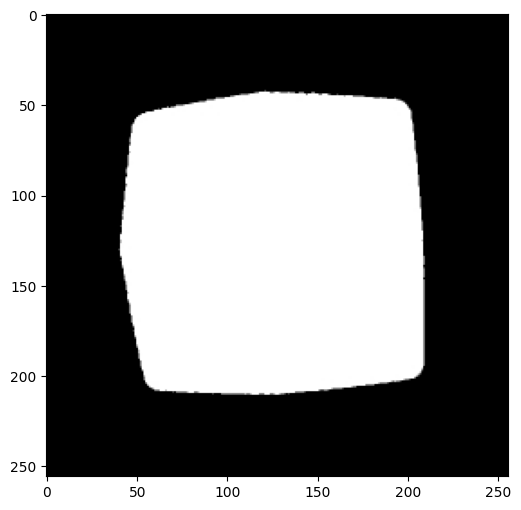

<Figure size 640x480 with 0 Axes>

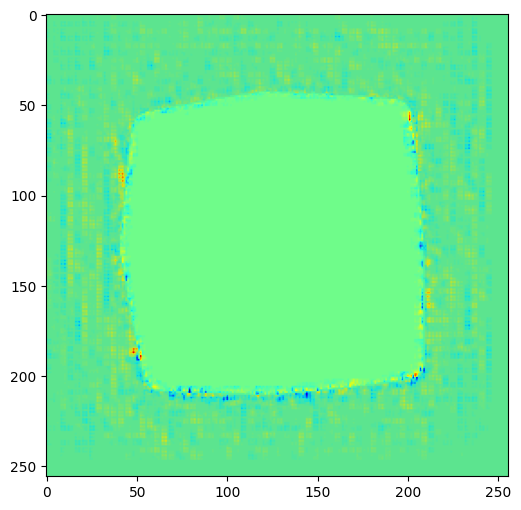

<Figure size 640x480 with 0 Axes>

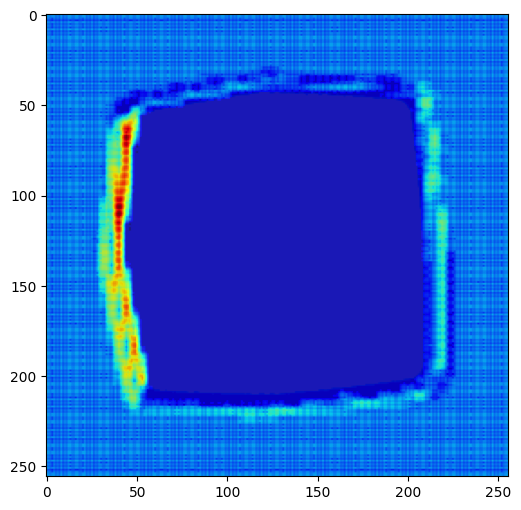

In [ ]:
result, img = testing_image("/content/drive/My Drive/to_predict/001-CUBO-Pt5083-11shells_BW-000169.jpg",model)

show_xplique(model,img , np.argmax(result),5,0.9)

1/1 [==============================] - 0s 27ms/step
[[0.0000000e+00 0.0000000e+00 1.0000000e+00 6.1326195e-14 0.0000000e+00]]
Shape is predicted as a Rhombus with 100.0% certainty


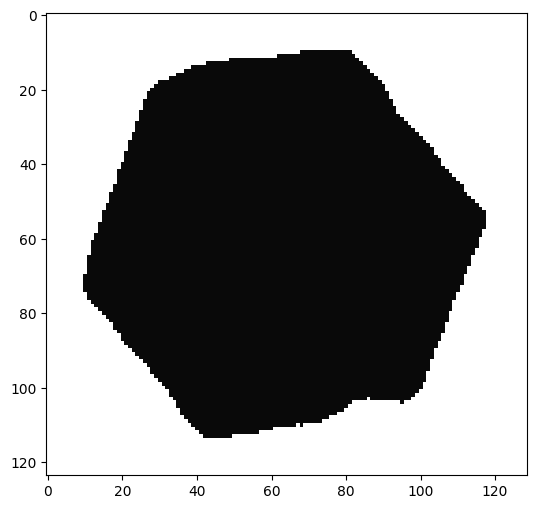

<Figure size 640x480 with 0 Axes>

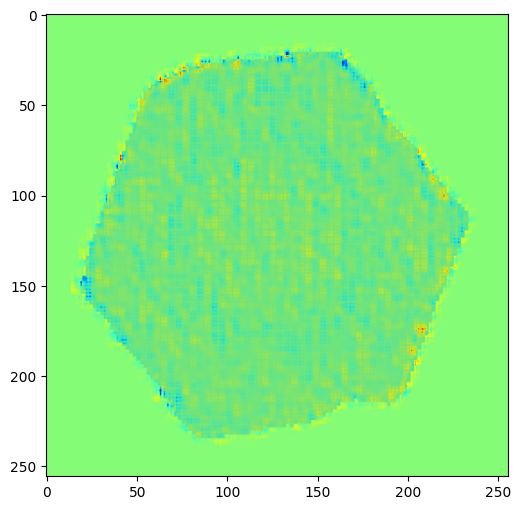

<Figure size 640x480 with 0 Axes>

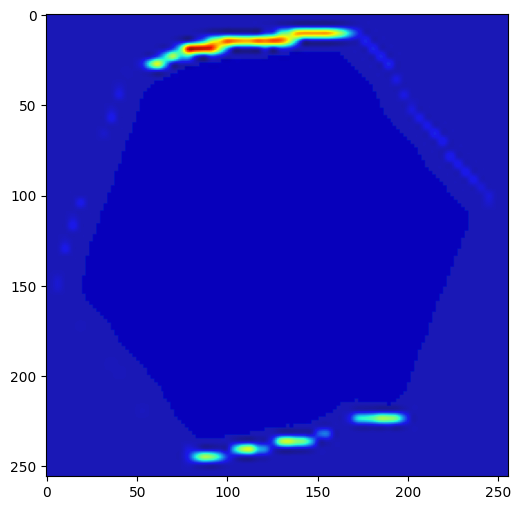

In [ ]:
result, img = testing_image("/content/drive/My Drive/to_predict/hexa9.png",model)

show_xplique(model,img , np.argmax(result),5,0.9)

In [ ]:
model.save('Model_256x256x1_Sillouhete_5classes.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from google.colab import files
files.download('Model_256x256x1_Sillouhete_5classes.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>